## Vizualization of the preprocessing, and calls extraction

In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.signal import stft
import librosa
from calls_demo import signal_to_calls
from denoising_demo import preprocessing

Might need to adapt the path to the .mp3 files below

In [2]:
# We chose to study only the 171 first .mp3 files (4 species)
mp3_dir = os.listdir("../data/mp3/")[0:172]
# Choose the file to preprocess
filename = mp3_dir[0]

In [3]:
sig_raw, f_s = librosa.load("data/mp3/" + filename)

if len(sig_raw.shape) == 2:
    sig_raw = sig_raw[:,0]

Let's use the *preprocessing* and *signal_to_calls* function

In [4]:
f_sub = 22000
sig = preprocessing(filename, f_sub)
indices, calls = signal_to_calls(sig)

signal preprocessed


In [10]:
def show_signal(signal, fs, x, y, title:str, slices=None):
    t_end = len(signal)/fs
    t = np.linspace(0, t_end, len(signal), endpoint=False)
    signal = signal
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111)
    ax.plot(t, signal)
    plt.xlim(x, y)
    fig.tight_layout()
    if slices:
        for pos in slices:
            ax.axvspan(pos[0]/fs, pos[1]/fs, alpha=0.4, color='red')
    ax.set(title= title + f" | {np.round(t_end, 1)} sec | sr = {fs} Hz", xlabel="time [sec]", ylabel="amplitude")
    plt.show()

We can now vizualize the raw signal, the denoised signal and the call extraction

In [6]:
# you can choose the time intervall
a, b = 0, 50

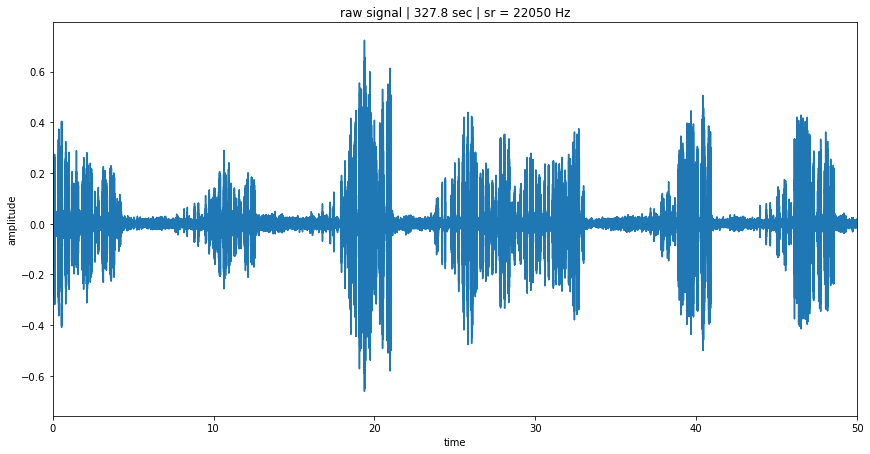

In [7]:
show_signal(sig_raw, f_s, a, b, "raw signal")

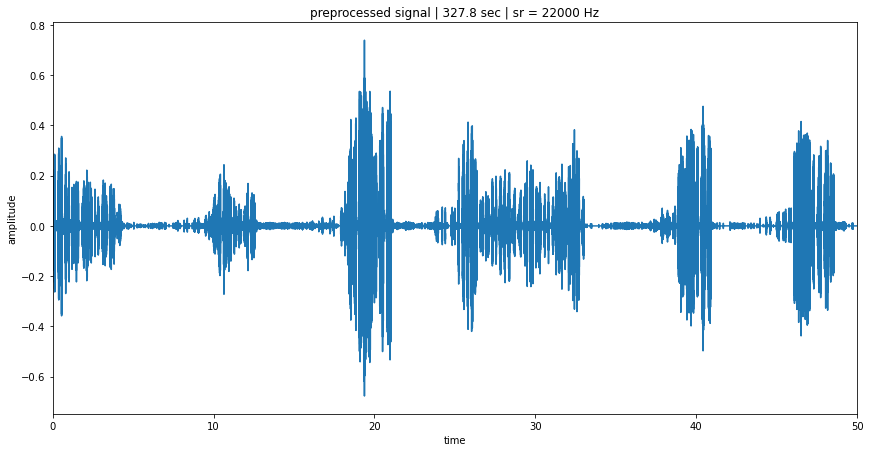

In [8]:
show_signal(sig, f_sub, a, b, "preprocessed signal")

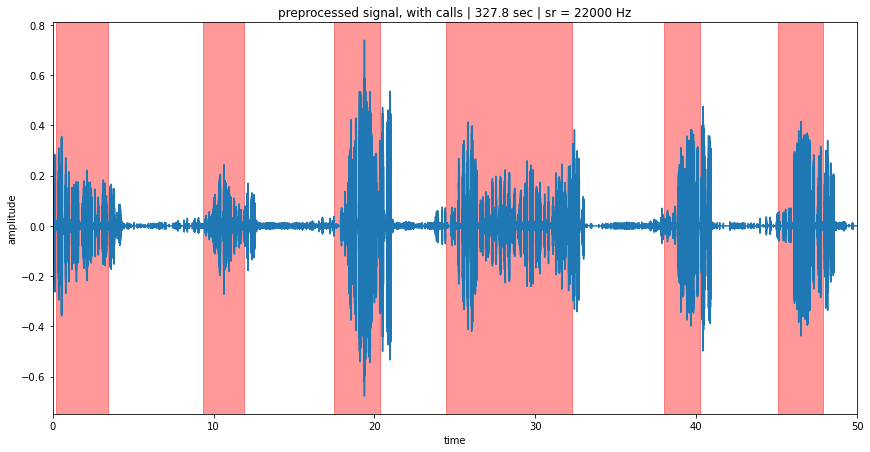

In [9]:
show_signal(sig, f_sub, a, b, "preprocessed signal, with calls", slices=indices)

Si vous voulez complétez, feel free